# Haberman Cancer Survival Dataset

- The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.


# Importing the Modules

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

---

# Importing the dataset

In [2]:
dataset = pd.read_csv('haberman.csv', header = None)

In [3]:
dataset.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [4]:
dataset.columns = ['Age', 'Year', 'PositiveAxillaryNode', 'SurviveStatus']

In [5]:
dataset.head()

,Age,Year,PositiveAxillaryNode,SurviveStatus
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# Description of the dataset

- Age of patient at time of operation (numerical)
- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)
- Survival status (class attribute)
 - 1 = the patient survived 5 years or longer
 - 2 = the patient died within 5 year

# Data cleaning and Data Analysis

In [6]:
dataset.shape

(306, 4)

- It shows that datset has 4 features and 306 points in each features

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                     306 non-null int64
Year                    306 non-null int64
PositiveAxillaryNode    306 non-null int64
SurviveStatus           306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


- this shows that no columns has null values

In [8]:
dataset.describe()

,Age,Year,PositiveAxillaryNode,SurviveStatus
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


- This will give us the complete summary of our dataset. Its mean median quartile deviation standard deviation minimum value maximum value

# Number of classes and number of datapoints per class

In [9]:
dataset['SurviveStatus'].nunique()

2

In [10]:
dataset['SurviveStatus'].value_counts()## datapoints in Class 1 is 225 and in Class 2 is 81

1    225
2     81
Name: SurviveStatus, dtype: int64

In [11]:
dataset['PositiveAxillaryNode'].nunique()

31

In [12]:
dataset['PositiveAxillaryNode'].value_counts()

0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: PositiveAxillaryNode, dtype: int64

In [13]:
dataset['Year'].nunique()

12

In [14]:
dataset['Year'].value_counts()

58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: Year, dtype: int64

In [15]:
dataset['Age'].nunique()

49

In [16]:
dataset['Age'].value_counts()

52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: Age, dtype: int64

# Objectives

-        We wanna check the relation between the age and the survival status.
-        To check whether with increases of year survival status has been increased or not. 
-        what is the relation of age and positiveAxillaryNode with survivalStatus.



----

# Performing univariate analysis( PDF,CDF, Boxplot,Violin Plots)

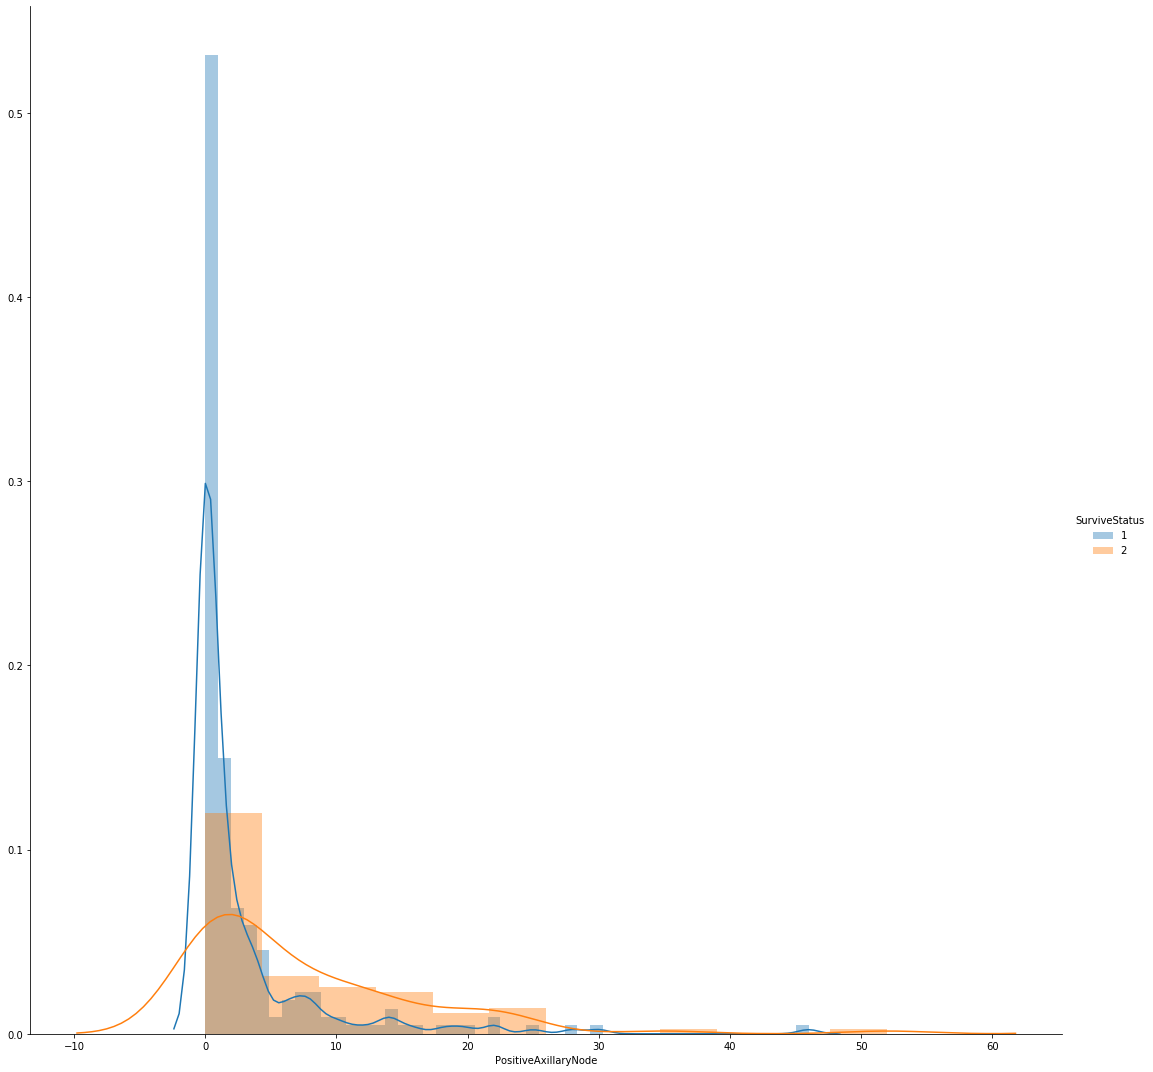

In [17]:
sb.FacetGrid(dataset, hue="SurviveStatus", size=15) \
   .map(sb.distplot, "PositiveAxillaryNode") \
   .add_legend();
plt.show();

#### Observation
- from the above graph we can conclude that their is a relation between the number of positiveAxillaryNode and the survival status of the patient. From the distibution we can infer that most survival patients have fallen in to zero positiveAxillaryNode.

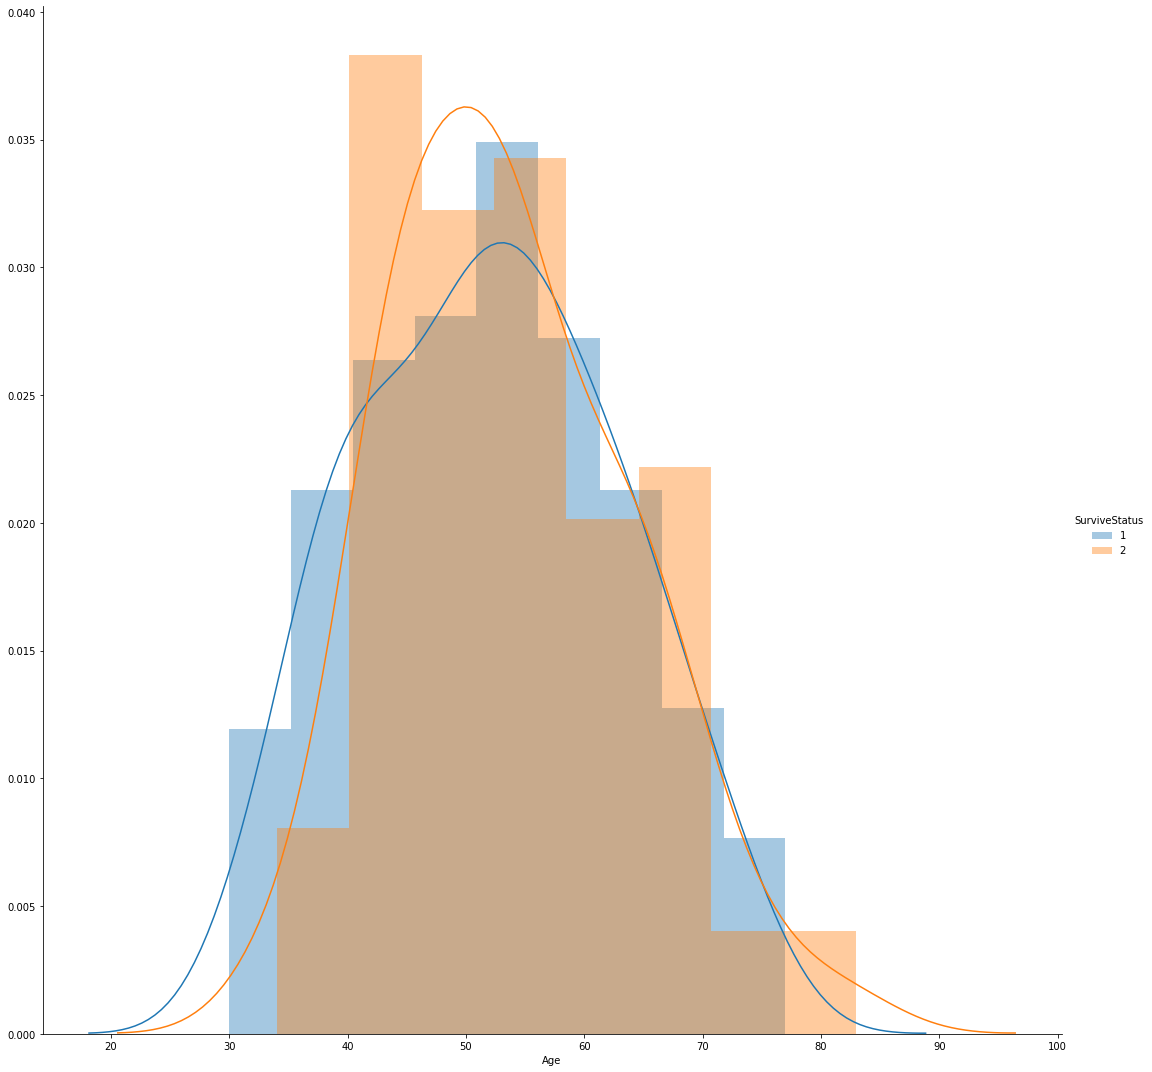

In [18]:
sb.FacetGrid(dataset, hue="SurviveStatus", size=15) \
   .map(sb.distplot, "Age") \
   .add_legend();
plt.show();

#### Observation:
- From the graph we can notice that when the age is less than 35years the survival status of the patient is more and is less when the age is greater than 75 

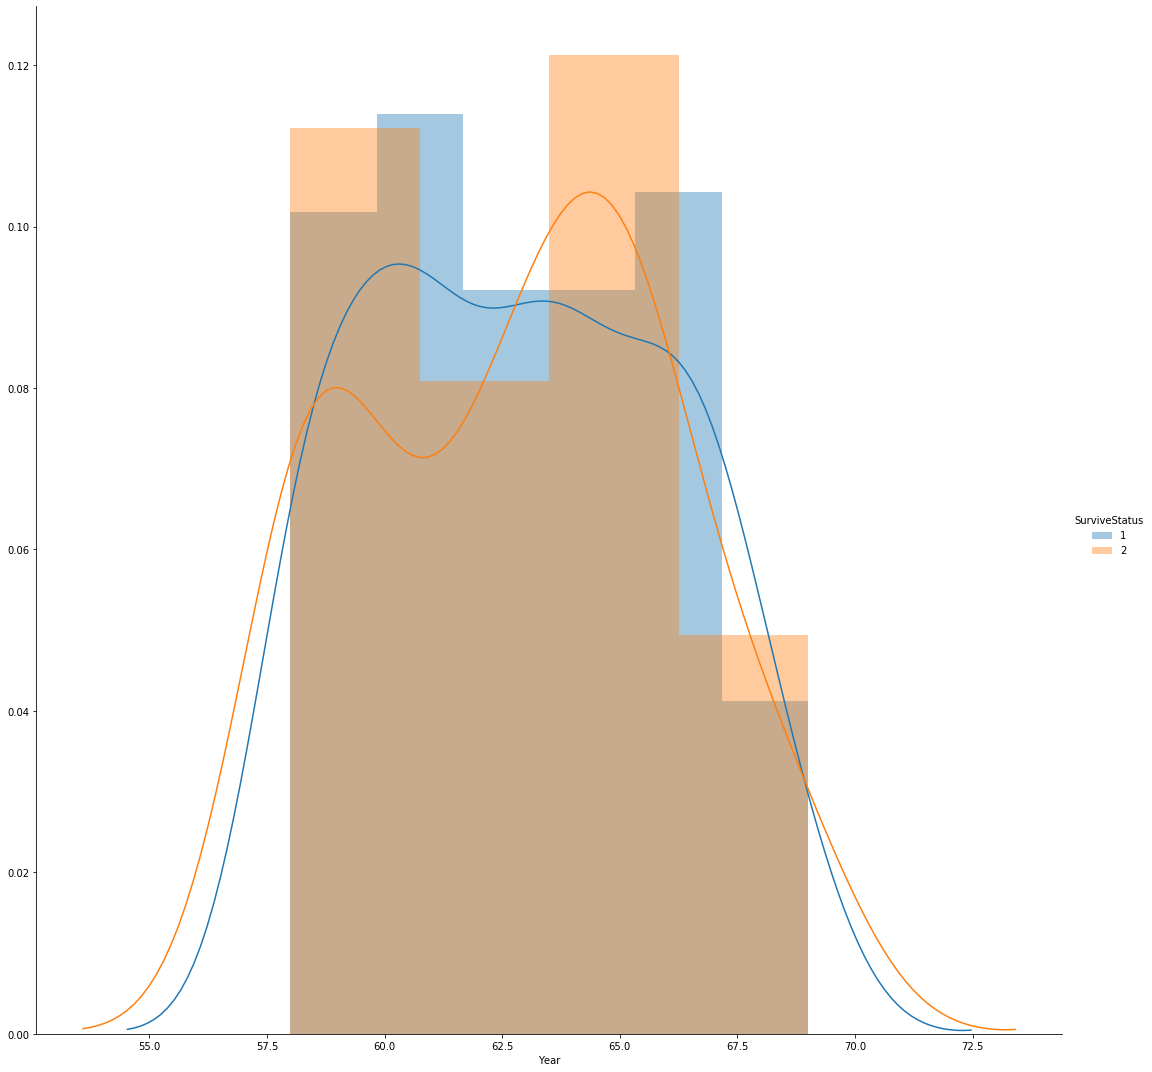

In [19]:
sb.FacetGrid(dataset, hue="SurviveStatus", size=15) \
   .map(sb.distplot, "Year") \
   .add_legend();
plt.show();

#### Observation:
- From the year distribution, we can observe that people who didnt survive suddenly rise and fall in between 1958 and 1960. More number of people are not survived in year of operation of 1963 - 1967

---

# CDF

In [20]:
## Alive = alive for more than 5 years
## dead = dead within 5 Years
alive=dataset.loc[dataset["SurviveStatus"]==1]
dead=dataset.loc[dataset["SurviveStatus"]==2]

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


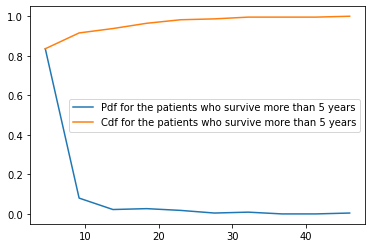

In [21]:
counts, bin_edges = np.histogram(alive['PositiveAxillaryNode'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who survive more than 5 years',
            'Cdf for the patients who survive more than 5 years'])
plt.show()

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


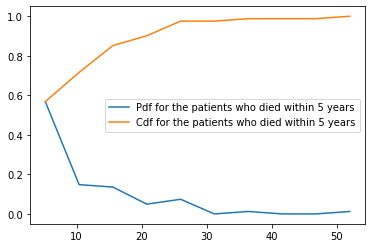

In [22]:
counts, bin_edges = np.histogram(dead['PositiveAxillaryNode'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)
plt.legend(['Pdf for the patients who died within 5 years',
            'Cdf for the patients who died within 5 years'])
plt.show()

----

# Box plot

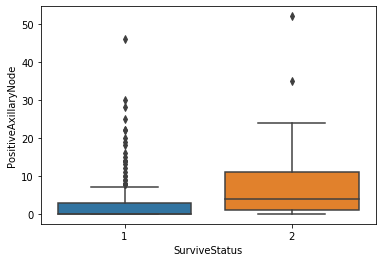

In [23]:
## Showing the 
sb.boxplot(x='SurviveStatus',y='PositiveAxillaryNode', data=dataset)
plt.show()

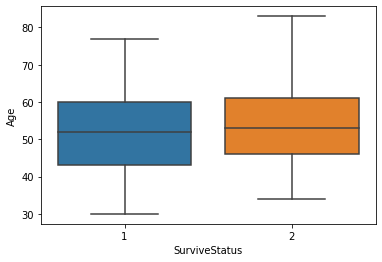

In [24]:
sb.boxplot(x='SurviveStatus',y='Age', data=dataset)
plt.show()

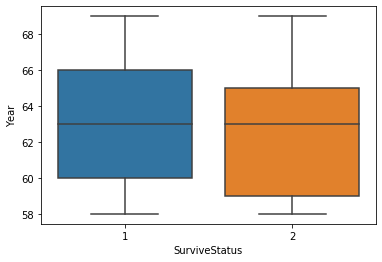

In [25]:
sb.boxplot(x='SurviveStatus',y='Year', data=dataset)
plt.show()

---

# Violin plot
- Violin plot is the combination of box plot and probability density function.
- Denser regions of the data are fatter, and sparser ones thinner in a violin plot.

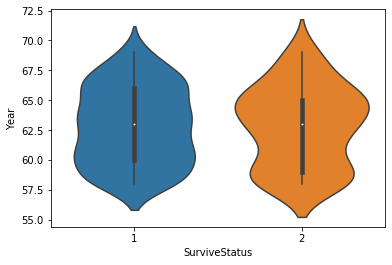

In [26]:
sb.violinplot(data = dataset,x = 'SurviveStatus', y = 'Year')
plt.show()

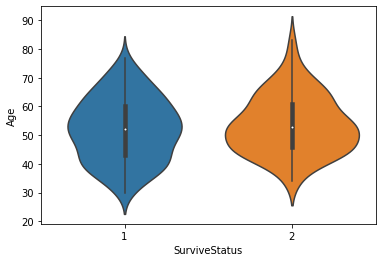

In [27]:
sb.violinplot(data = dataset,x = 'SurviveStatus', y = 'Age')
plt.show()

-  Loking at both the box plot and the violin plot we can say that more number of patients who are dead have age between 46-62,year between 59-65 and the patients who survived have age between 42-60, year between 60-66.

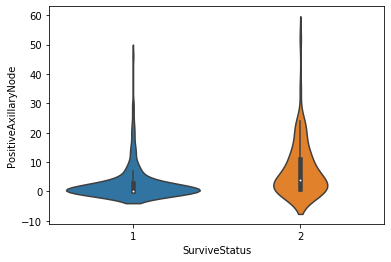

In [28]:
sb.violinplot(data = dataset,x = 'SurviveStatus', y = 'PositiveAxillaryNode')
plt.show()

- The number of PositiveAxillaryNode of the survivors is highly densed from 0 to 5.
- Almost 80% of the patients have less than or equal to 5 positiveaxillarynode survived more than 5 years.

---

# Bivariate Analysis

#### Scatter plot

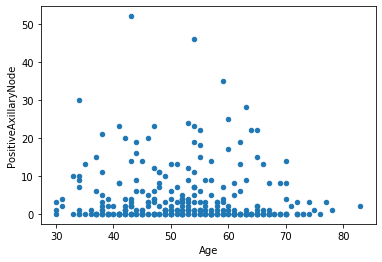

In [29]:
dataset.plot(kind='scatter', x='Age', y='PositiveAxillaryNode') ;
plt.show()

- FRom the above graph we can see that 0 positiveaxillarynode is more for all age group

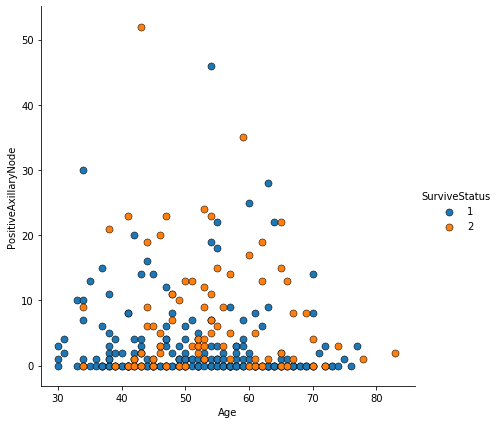

In [30]:
## Creating a facetgrid
g = sb.FacetGrid(dataset, hue = 'SurviveStatus',size = 6)
kws = dict(s = 50, linewidth = 0.5, edgecolor = 'black')
g = g.map(plt.scatter, 'Age', 'PositiveAxillaryNode',**kws)
#g.set(xlim = (0,100), ylim = (0,100))
g.add_legend()
plt.show();

- Since the blue and orange points are not much seperated we are not able to give a good conclusion from it.

### Pair Plot

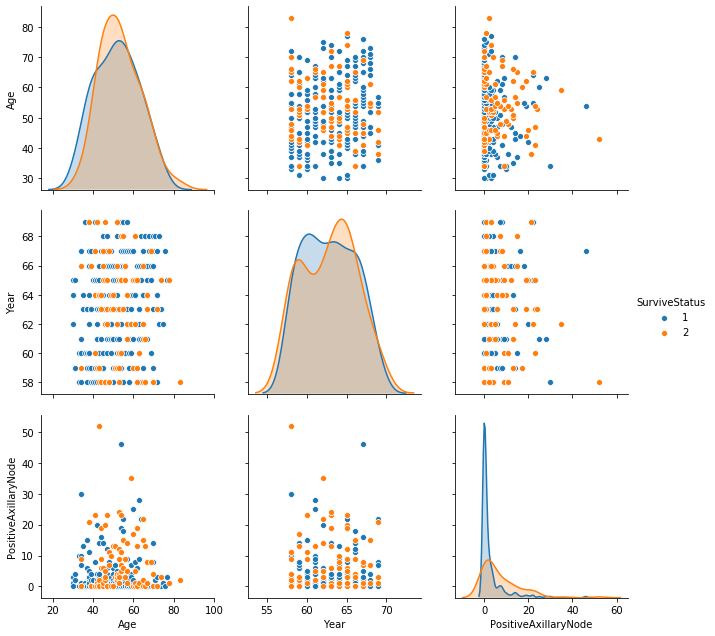

In [31]:
plt.close();
sb.pairplot(dataset, hue="SurviveStatus",
             vars=['Age','Year','PositiveAxillaryNode'], size=3)
plt.show()

- It looks like we cannot distinguish the data easily with the help of above plots as most of them are overlapping.

---

# Conclusion:


- 1.There are 306 observations with 4 features in the data set.
- 2.Since the dependent variable i.e the survivestatus column has 225 patient with survival rate of more than 5 years and 81 of them has a survival rate of less than 5 years hence it is an imbalance dataset
- 3.Using PDF's
         -  a.  when the age is less than 35years the survival status of the patient is more and is less when the age is greater than 75
         -  b. people who didnt survive suddenly rise and fall in between 1958 and 1960. More number of people are not survived in year of operation of 1963 - 1967
         -  c. positiveAxillaryNode is the only feature that is useful to know about the survival status of patients as there is difference between the distributions for both classes(labels). From that distibution we can infer that most survival patients have fallen in to zero positiveAxillarynode.

- Using Box plot and Violin plots-
         -  a. The number of positiveaxillarynodes of the survivors is highly densed from 0 to 5.
         -  b. Almost 80% of the patients have less than or equal to 5 positive lymph survived more than 5 years.
         -  c. Loking at both the box plot and the violin plot we can say that more number of patients who are dead have age between 46-62,year between 59-65 and the patients who survived have age between 42-60, year between 60-66